# <center>Churn Analysis and Customer Retention Strategies for a Telecommunication Company</center>

##  Business Understanding

### Background
The telecommunication industry is highly competitive, with companies vying for customers' attention and loyalty. One of the significant challenges faced by telecommunication companies is customer churn, which refers to the rate at which customers stop using their services and switch to competitors. Customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analyzing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

###  Business Objective
The primary objective of this churn analysis project is to help the telecommunication company reduce customer churn and enhance customer retention through data-driven insights and predictive modeling to ultimately achieve higher revenue and profitability.

###  Hypothesis


**Null Hypothesis (H0):** The Monthly Charges, Total charges and tenure do not have significant impact on the Churn rate.
 
**Alternative Hypothesis (H1):** The Monthly Charges, Total charges and tenure significantly impact the Churn rate. 

 ### Questions
1.	Which gender exhibited the highest churn?
2.	Is there a significant association between gender and churn?
3.	Does the presence of dependents affect customer churn? 
4.	Which gender pays more monthly charges? 
5.	Does the presence of dependents affect monthly charges?
6.	Do paperless billing and payment methods influence churn?  
7.	Is there a correlation between senior citizens and churn?


### Install required packages


In [798]:
#Libraries for sql
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#libraries for visulation
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import statsmodels.api as sm
offline.init_notebook_mode(connected=True) # Configure Plotly to run offline

#Feature processing libraries
from sklearn.impute import SimpleImputer

### Create a connection by accessing connection string with defined environment variables


In [799]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


In [800]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [801]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [802]:
# Now the sql query to get the data is what what you see below. 
query = "Select * from dbo.LP2_Telco_churn_first_3000"


## Data Understanding



###  Resources availability 
Data for this project

In this project, the dataset resides in 3 places. For ease of access and security we have made the datasets available there in the GitHub Repository 

- First Data Set

The data called LP2_Telco_churn_First_3000 was extracted from a database.

- Second Data Set

The data called Telco-churn-second-2000.xlsx was found in OneDrive which is our test dataset

- Third Data Set

The third part of the data called LP2_Telco-churn-last-2000.csv. is hosted on a GitHub Repository 


###  Column names and description
**Gender** -- Whether the customer is a male or a female

**SeniorCitizen** -- Whether a customer is a senior citizen or not

**Partner** -- Whether the customer has a partner or not (Yes, No)

**Dependents** -- Whether the customer has dependents or not (Yes, No)

**Tenure** -- Number of months the customer has stayed with the company

**Phone Service** -- Whether the customer has a phone service or not
(Yes, No)

**MultipleLines** -- Whether the customer has multiple lines or not

**InternetService** -- Customer's internet service provider (DSL, Fiber
Optic, No)

**OnlineSecurity** -- Whether the customer has online security or not
(Yes, No, No Internet)

**OnlineBackup** -- Whether the customer has online backup or not (Yes,
No, No Internet)

**DeviceProtection** -- Whether the customer has device protection or
not (Yes, No, No internet service)

**TechSupport** -- Whether the customer has tech support or not (Yes,
No, No internet)

**StreamingTV** -- Whether the customer has streaming TV or not (Yes,
No, No internet service)

**StreamingMovies** -- Whether the customer has streaming movies or not
(Yes, No, No Internet service)

**Contract** -- The contract term of the customer (Month-to-Month, One
year, Two year)

**PaperlessBilling** -- Whether the customer has paperless billing or
not (Yes, No)

**Payment Method** -- The customer's payment method (Electronic check,
mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges** -- The amount charged to the customer monthly

**TotalCharges** -- The total amount charged to the customer

**Churn** -- Whether the customer churned or not (Yes or No)


### Data Loading

In [803]:
data=pd.read_sql(query,connection)
data1 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2 = pd.read_excel('Telco-churn-second-2000.xlsx')

## Exploratory Data Analysis
Here we will analyze and investigate data sets and summarize their characteristics by using data visualization,
also since we will concatenate all the data sets after cleaning we will rename the colums after cleaning each dataset

### EDA On Telco Churn 3000

In [804]:
#view the data set
data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0             True           Electronic check      29.850000     29.850000   
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [805]:
#check for duplicated values
data.duplicated().sum()

0

In [806]:
#General info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [807]:
#check the number of rows and columns
data.shape

(3000, 21)

In [808]:
#view number of missing values
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Notes on data (Telco churn First 3000)
* We have a total of 3000 rows
* We have a total of 21 columns
* Our target variable has true/false attributes, therefore it is a binary classification problem
* Online Security,Online Backup,Device Protection,tech support,streaming tv,streaming movies all have 651 missing values and multiple lines has 269 missing values
* There are no duplicated values

### EDA On Telco Churn last 2000

In [809]:
#view data set
data1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes          No              No  Month-to-month              Yes   
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [810]:
#check for duplicated values
data1.duplicated().sum()

0

In [811]:
#General info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [812]:
#check number of rows and columns
data1.shape

(2043, 21)

In [813]:
#check number of missing values
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Notes on Telco Churn last 2000
* We have a total of 2043 rows
* We have a total of 21 columns
* Our target variable has yes/no attributes, therefore it is a binary classification problem
* The TotalCharges column is an object data type, so we will check that.
* There are no missing values
* There are no duplicated values

##### We observed that the dataset which is the telco churn 3000 has a lot of missing values so we will like to check the percentage of the columns that had missing values to observe whether it is relevant to our dataset

In [814]:
# # Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100


In [815]:
# Filter the columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]


In [816]:
print(columns_with_missing)

MultipleLines        8.966667
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
TotalCharges         0.166667
Churn                0.033333
dtype: float64


In [817]:
# Display the missing percentage for columns with missing values
fig = go.Figure()
fig.add_trace(go.Bar(x=columns_with_missing.index, y=columns_with_missing.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Percentage of Missing Values in Columns', xaxis_title='Columns', yaxis_title='Percentage')

# Display the plot
fig.show()


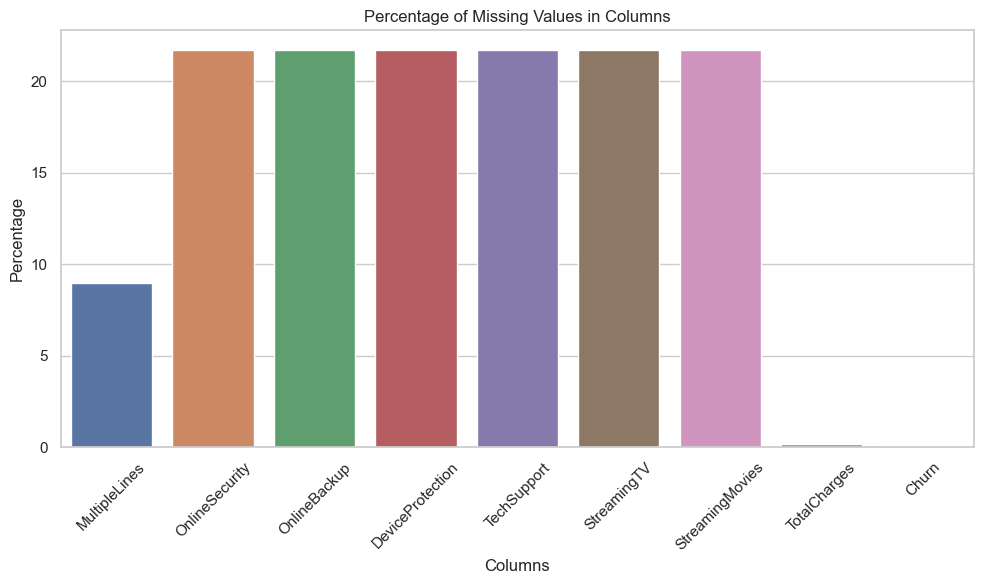

In [818]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter the columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]

# Create a bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=columns_with_missing.index, y=columns_with_missing.values)

# Set the title and labels
plt.title('Percentage of Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## Notes

##### After checking the percentage we observed that about 6 columns have 21.7% of data missing whiles others like Multiplelines,total charges and churn have 8.97%,0.167% and 0.03 respectively.These percentages show that the missing values in these columns can be removed but to maintain more data for our model to train we will explore further to determine how to handle the missing values

The dataset telco churn last 2000 has no missing values therefore we wanted to explore if that dataset can help in a way to impute the missing values in telco churn first 3000

In [819]:
#put all missing values in a variable
missing=data.isnull().any()


In [820]:
#we exclude missing values that are zero
missing = missing[missing]

In [821]:
# Compare unique values in columns with missing values to corresponding columns in data1
for col in missing.index:
    if col not in ["TotalCharges", "Churn"]:
        print(f"Unique values in {col} column of first dataset:\n{data[col].unique()}")
        print(f"Unique values in {col} column of second dataset:\n{data1[col].unique()}")
        print("-------------------------------------")


Unique values in MultipleLines column of first dataset:
[None False True]
Unique values in MultipleLines column of second dataset:
['No' 'No phone service' 'Yes']
-------------------------------------
Unique values in OnlineSecurity column of first dataset:
[False True None]
Unique values in OnlineSecurity column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in OnlineBackup column of first dataset:
[True False None]
Unique values in OnlineBackup column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in DeviceProtection column of first dataset:
[False True None]
Unique values in DeviceProtection column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in TechSupport column of first dataset:
[False True None]
Unique values in TechSupport column of second dataset:
['Yes' 'No' 'No internet service']
-------------------

## Notes
After comparing the unique values between the two datasets,we noticed:
* For multiplelines values, the first dataset contained True,False,None and the second conatined Yes,No,No Phone service.Therefore we assume the missing values for the Multiplelines in the first dataset will also be imputed with No phone service as seen in the second dataset
* For OnlineSecurity values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineSecurity in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For OnlineBackup values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineBackup in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For DeviceProtection values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the DeviceProtection in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For TechSupport values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the Techsupport in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingTV values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingTV in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingMovies values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingMovies in the first dataset will also be imputed with No Internet service as seen in the second dataset

#### After determing how the missing values will be imputed we will concatenate  the dataset from the database(Telco churn first 3000) and the data from  the github repository(Teleco churn last 2000)

In [822]:
## concatenation
Telco_churn=pd.concat([data,data1],ignore_index=True)

In [823]:
#view telco churn
Telco_churn.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female         False    True      False       1        False   
1  5575-GNVDE    Male         False   False      False      34         True   
2  3668-QPYBK    Male         False   False      False       2         True   
3  7795-CFOCW    Male         False   False      False      45        False   
4  9237-HQITU  Female         False   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000         29.85  False  
1               Mailed check      56.950001        1889.5  False  
2               Mailed check      53.849998    108.150002   True  
3  Bank transfer (automatic)      42.299999       1840.75  False  
4           Electronic check      70.699997    151.649994   True  

[5 rows x 21 columns]

In [824]:
#general summary info
Telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


### Converting the totalcharges column to a numerical variable
From .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was in numeric  there we will be chaning it to a numeric data type

In [825]:
#convert it to numerical
Telco_churn["TotalCharges"]= pd.to_numeric(Telco_churn["TotalCharges"], errors="coerce")

In [826]:
#check datatype of totalcharges
Telco_churn["TotalCharges"].dtype

dtype('float64')

##### Before concatinating both datasets,the dataset telco churn 3000 contained true,false values and the other yes or no.Therefore most columns in the concatinated dataset contain yes and no and true or false so to ensure uniformity we will choose one.The reason we are choosing  yes or no is that from our data understanding we observed the values needed to be present in the dataset are yes or no

In [827]:
#replace all true or false in the dataset to yes or no
Telco_churn.replace({True: "Yes", False: "No"}, inplace=True)

In [828]:
#view dataset after changes
Telco_churn.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3          None             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000     29.850000     No  
1               Mailed check      56.950001   1889.500000     No  
2               Mailed check      53.849998    108.150002    Yes  
3  Bank transfer (automatic)      42.299999   1840.750000     No  
4           Electronic check      70.699997    151.649994    Yes  

[5 rows x 21 columns]

### Handling Missing Values

In [829]:
#before we impute the missing values we want to check the number of missing values in each column
Telco_churn.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

## Imputing missing values in Total charges column

#### We want to visualise the Total Charges Column to determine which method we will use to impute the missing values

In [830]:
#Create a box plot for the "TotalCharges" column
fig = go.Figure()
fig.add_trace(go.Box(y=Telco_churn["TotalCharges"], name="TotalCharges",marker=dict(color='darkblue')))

# Update layout
fig.update_layout(title='Box Plot of TotalCharges', yaxis_title='TotalCharges')

# Display the plot
fig.show()


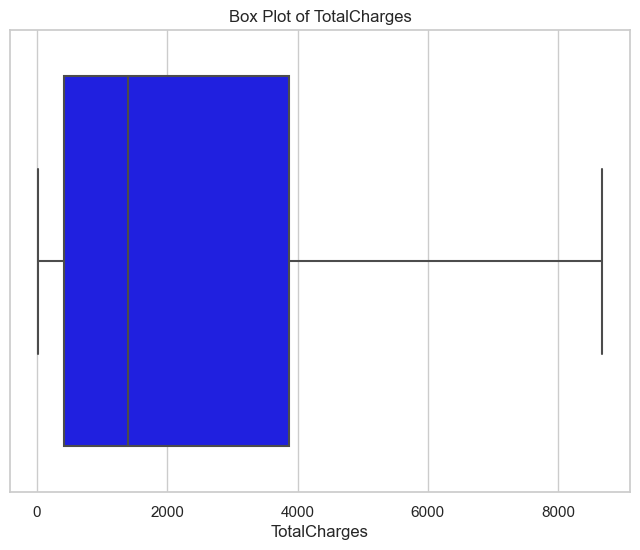

In [831]:
# Create a box plot 
plt.figure(figsize=(8, 6))
sns.boxplot(x=Telco_churn["TotalCharges"], color='blue')

# Set the title and labels
plt.title('Box Plot of TotalCharges')
plt.xlabel('TotalCharges')

# Show the plot
plt.show()

#### From the boxplot you can tell there is no outlier therefore the missing values will be imputed with mean since mean is sensitive to outliers


In [832]:
#we create a variable to contain our amount column so it will be easier to impute the missing values
num_cols=["TotalCharges"]

In [833]:
#Create the SimpleImputer object and fit it to the data
impute=SimpleImputer(strategy="mean").fit(Telco_churn[num_cols])

In [834]:
# Transform the data to impute missing values
imputed_data = impute.transform(Telco_churn[num_cols])


In [835]:
# Convert the imputed data back to a DataFrame with the original columns
imputed_df = pd.DataFrame(imputed_data, columns=num_cols)


In [836]:
# Update the main dataframe with the imputed values
Telco_churn[num_cols] = imputed_df

In [837]:
#view missing value in total charges column to check if missing values still exist
Telco_churn["TotalCharges"].isnull().sum()

0

## Imputing missing values in Churn column

In [838]:
#view number of missing values in churn column
Telco_churn["Churn"].isnull().sum()

1

In [839]:
#we view churn colums
Telco_churn["Churn"]

0         No
1         No
2        Yes
3         No
4        Yes
5        Yes
6         No
7         No
8        Yes
9         No
10        No
11        No
12        No
13       Yes
14        No
15        No
16        No
17        No
18       Yes
19        No
20       Yes
21        No
22       Yes
23        No
24        No
25        No
26       Yes
27       Yes
28        No
29       Yes
30        No
31        No
32        No
33        No
34        No
35        No
36       Yes
37        No
38       Yes
39       Yes
40        No
41        No
42        No
43        No
44        No
45        No
46        No
47       Yes
48        No
49        No
50        No
51       Yes
52        No
53       Yes
54        No
55       Yes
56        No
57        No
58        No
59        No
60        No
61        No
62        No
63        No
64       Yes
65        No
66        No
67        No
68        No
69        No
70        No
71        No
72        No
73        No
74        No
75        No
76        No

#### After viewing the churn column and realising it has only one missing value we decided to fill it with the most occuring

In [840]:
# Calculate the mode of the "Churn" column
churn_mode = Telco_churn["Churn"].mode()


In [841]:
# Count the occurrences of each value in the "Churn" column
churn_counts = Telco_churn["Churn"].value_counts()


In [842]:
# Create a bar plot to visualize the counts
fig = go.Figure(go.Bar(x=churn_counts.index, y=churn_counts.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Churn Mode and Counts', xaxis_title='Churn', yaxis_title='Counts')

# Display the plot
fig.show()

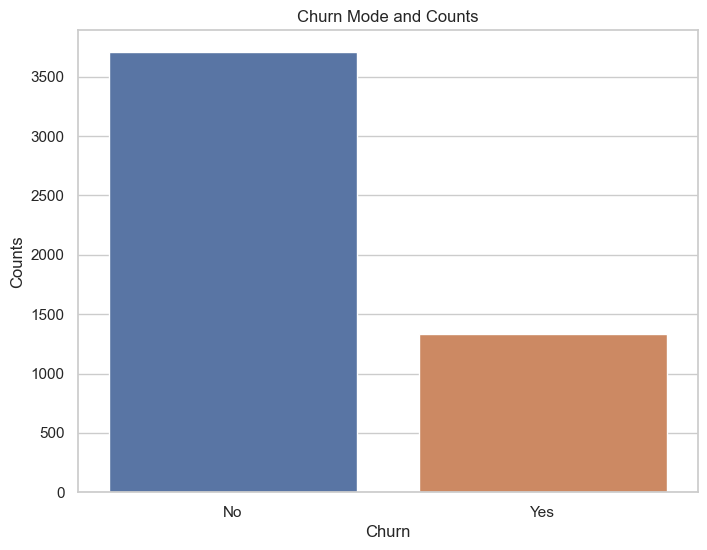

In [843]:
# Calculate the mode of the "Churn" column
churn_mode = Telco_churn["Churn"].mode()

# Count the occurrences of each value in the "Churn" column
churn_counts = Telco_churn["Churn"].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Set the title and labels
plt.title('Churn Mode and Counts')
plt.xlabel('Churn')
plt.ylabel('Counts')

# Display the plot
plt.show()

#### From our visual you can see No appears the most with 3706 therefore we will fill the missing value in the churn column will be filled with mode

In [844]:
#replace missing value with mode which is no
Telco_churn["Churn"].fillna("No",inplace=True)


In [845]:
##check churn column to see if changes were made
Telco_churn["Churn"].isnull().sum()

0

#### Imputing missing values in multiple lines,online security,online backup,device protection,tech support,streaming movies,streaming tv columns

In [846]:
# Calculate the number of missing values in each column
missing_values = Telco_churn.isnull().sum()


In [847]:
# Filter the columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
dtype: int64


#### From our eda we deduced that MultipleLines will be imputed with no phone service and Online Security,Online Backup,Device  Protection,TechSupport StreamingTV,StreamingMovies will all be imputed with no internet service

In [848]:
#replacing the missing values of the reamining columns
Telco_churn["MultipleLines"].fillna("No phone service",inplace=True)
Telco_churn["OnlineSecurity"].fillna("No internet service",inplace=True)
Telco_churn["OnlineBackup"].fillna("No internet service",inplace=True)
Telco_churn["DeviceProtection"].fillna("No internet service",inplace=True)
Telco_churn["TechSupport"].fillna("No internet service",inplace=True)
Telco_churn["StreamingMovies"].fillna("No internet service",inplace=True)
Telco_churn["StreamingTV"].fillna("No internet service",inplace=True)

In [849]:
#check missing values in the dataset
Telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### There are no missing values in the dataset

In [850]:
#We will like to drop our ID column for our dataset since it composes of unique values
Telco_churn= Telco_churn.drop("customerID", axis= 1)

In [851]:
### I am saving it so that I can use it for power BI
## Telco_churn.to_csv("C:\\Users\\User\\Desktop\\bi\\Churn_Analysis.csv")

## Univariate Analysis 

### Describing The Data

In [852]:
Telco_churn.describe()

tenure  MonthlyCharges  TotalCharges
count  5043.000000     5043.000000   5043.000000
mean     32.576641       65.090214   2302.062861
std      24.529807       30.068133   2267.682399
min       0.000000       18.400000     18.799999
25%       9.000000       35.775000    418.000000
50%      29.000000       70.550003   1406.000000
75%      56.000000       90.050003   3857.575073
max      72.000000      118.650002   8670.100000

### Notes on the .describe()
#### Tenure
* This variable represents the number of months the customer has been with the company
* The output shows that on average a customer 32.57 months with the company but it has a high standard deviation of 24.53 months which indicates greater variability in customer tenures.
* The output shows the maximum amount of months a customer stays with comapny is 72
* 75% of customers spend 56 or lower months with the company

#### Monthly Charges
* This variable represents the amount charged to the customer monthly.
* The output shows that averagely a customer is charged 65.09 per month with 75% paying 90.05 or lower
* A standard deviation of 30.07 in this case indicates greater variability in total charges. 

#### Total Charges
* This variable represents the total amount charged to the customer
* The average total charge across all customers, which is approximately 2302.06,whiles 75% of customers have a total charge of 3857.58 or lower.
* Has a  large stanadrd deviation of 2267.68 which indicates greater variability in total charges.



array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

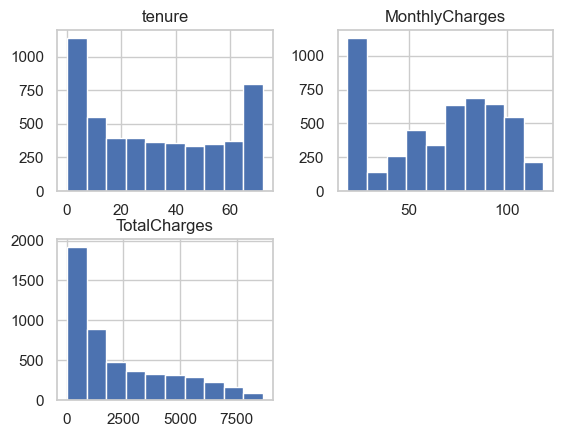

In [853]:
Telco_churn.hist(bins=10)

### Observations
* Most customers stay on the network for zero months
* Most customers that are charged 25 per month are the highest
* For customers that have zero total charges have the highest frequency.



## Univariate analysis for churn column

In [854]:
# Create a pie chart 
fig = px.pie(Telco_churn, names="Churn", title='Churn Chart')

# Display the plot
fig.show()

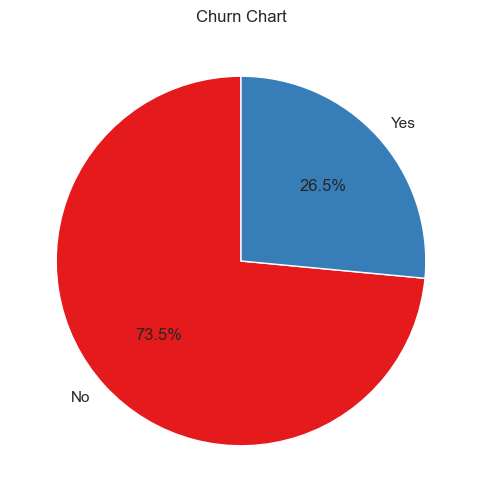

In [855]:

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
churn_counts = Telco_churn["Churn"].value_counts()
sns.set_palette("Set1")
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Chart')

# Display the plot
plt.show()


#### Notes
* We can see there is an imbalance in our dataset
* 73.5% of the  customers are still loyal
* 26.5% of the customers in the current dataset have left the company 


## Monthly charge against churn

In [856]:
#Create a histogram 
fig = px.histogram(Telco_churn, x="MonthlyCharges", color="Churn", nbins=20,
                   title="Distribution of Monthly Charges by Churn",
                   labels={"Monthly Charges": "Monthly Charges", "Churn": "Churn"})

# Display the plot
fig.show()

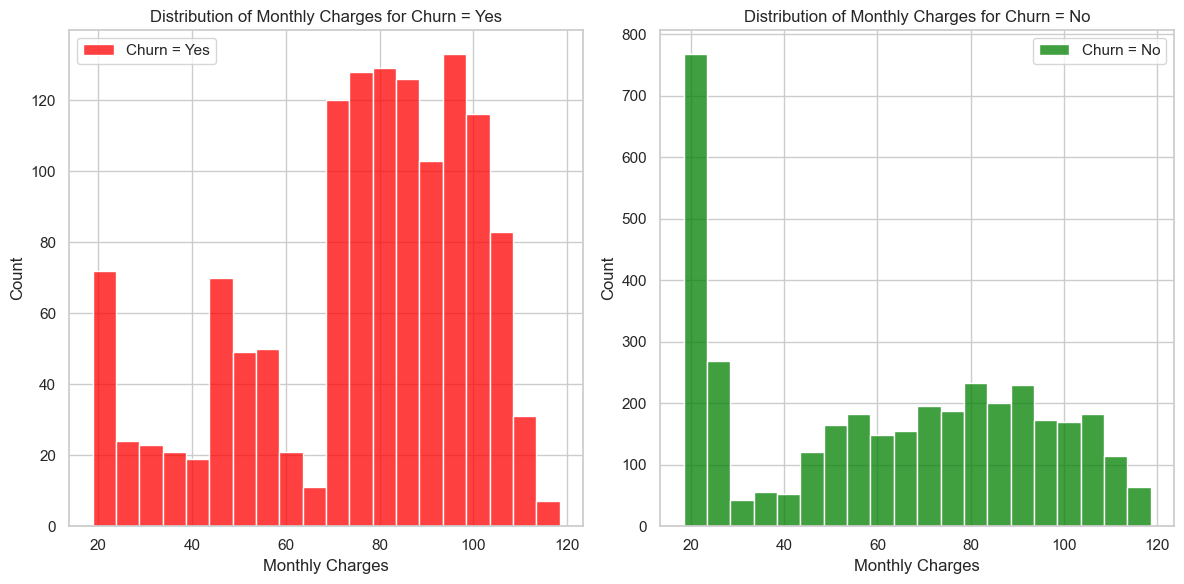

In [857]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histograms for Churn = Yes and Churn = No
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "Yes"], x="MonthlyCharges", bins=20, ax=axes[0], color="red", label="Churn = Yes")
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "No"], x="MonthlyCharges", bins=20, ax=axes[1], color="green", label="Churn = No")

# Add labels and title to each subplot
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Monthly Charges for Churn = Yes")
axes[0].legend()

axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Monthly Charges for Churn = No")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Notes
From the visual you can see the customers who churned the most paid a monthly charge between 70-110 and those that did not churn were charged 20


### Univaraiate Analysis of colums that have values imputed

## Total Charges against Churn


In [858]:
# Create a histogram 
fig = px.histogram(Telco_churn, x="TotalCharges", color="Churn", nbins=20,
                   title="Distribution of Total Charges by Churn",
                   labels={"TotalCharges": "Total Charges", "Churn": "Churn"})
# Display the plot
fig.show()

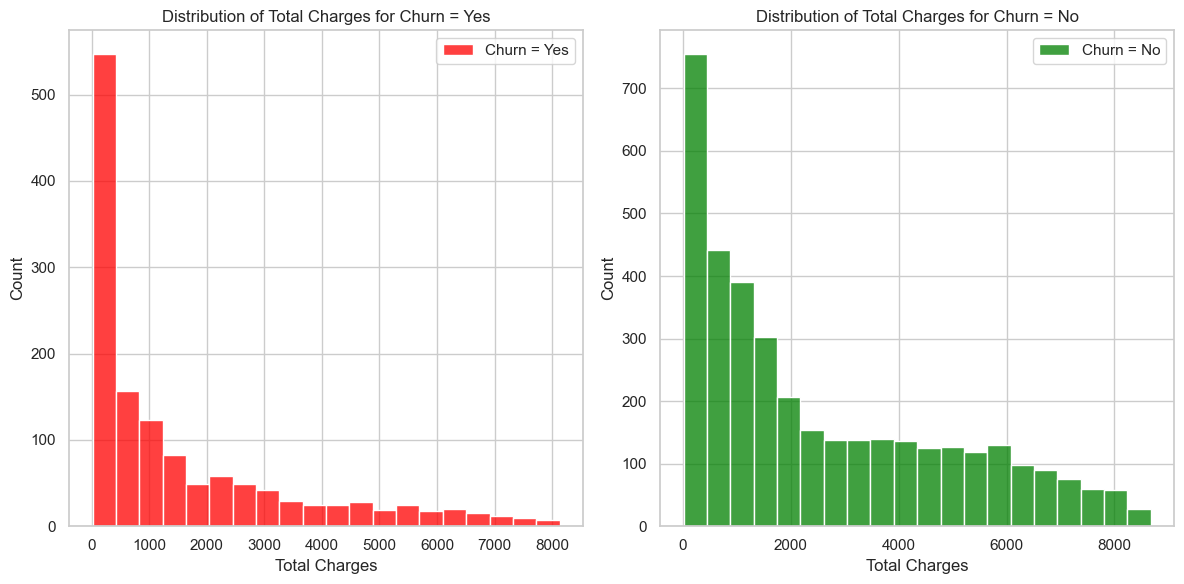

In [859]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histograms for Churn = Yes and Churn = No
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "Yes"], x="TotalCharges", bins=20, ax=axes[0], color="red", label="Churn = Yes")
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "No"], x="TotalCharges", bins=20, ax=axes[1], color="green", label="Churn = No")

# Add labels and title to each subplot
axes[0].set_xlabel("Total Charges")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Total Charges for Churn = Yes")
axes[0].legend()

axes[1].set_xlabel("Total Charges")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Total Charges for Churn = No")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Notes
- It can be seen from the image above that the most loyal customers pay a total charge between 0 and 2000. 
- Similarly, most churners paid a total charge between 0 and 2000.

## Online Security Against Churn

In [860]:
# Create a DataFrame for the count of "OnlineSecurity" against "Churn"
count_df = Telco_churn.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="OnlineSecurity", y="Count", color="Churn",
             title="Count of Online Security with respect to Churn",
             labels={"OnlineSecurity": "Online Security", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


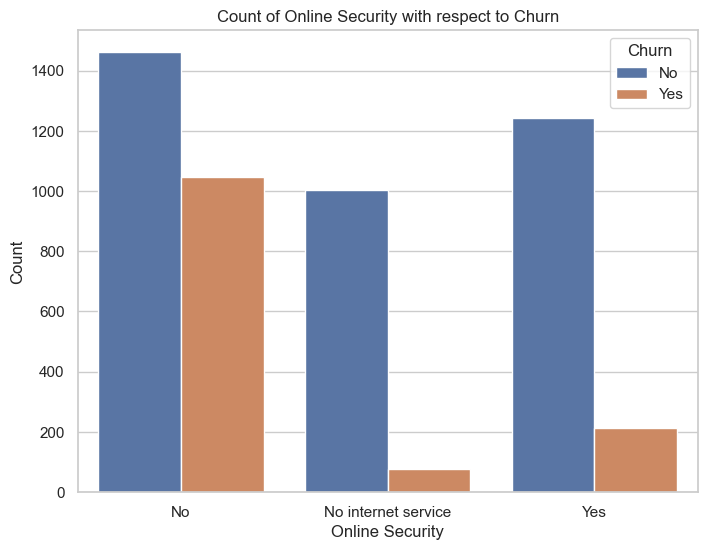

In [861]:
# Create a DataFrame for the count of "OnlineSecurity" against "Churn"
count_df = Telco_churn.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="OnlineSecurity", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.title("Count of Online Security with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()


## Notes
* Customers with No Online Security churned the most
* From the visual customers with no internet service churned the least showing that customers are more interested with the online security

## Online Backup Against Churn

In [862]:
# Create a DataFrame for the count of "OnlineBackup" against "Churn"
count_df = Telco_churn.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="OnlineBackup", y="Count", color="Churn",
             title="Count of Online Backup with respect to Churn",
             labels={"OnlineBackup": "Online Backup", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


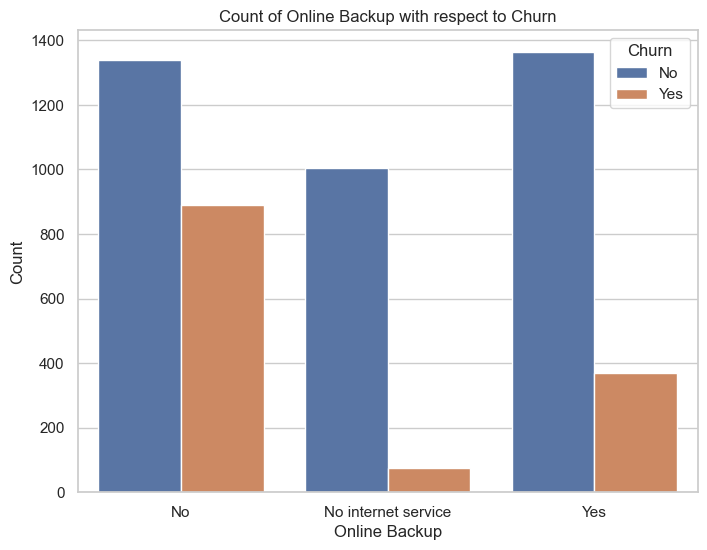

In [863]:
# Create a DataFrame for the count of "OnlineBackup" against "Churn"
count_df = Telco_churn.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="OnlineBackup", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.title("Count of Online Backup with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customers with no OnlineBackup churned the most
* Customers that didn't have access to internet services to use online backup churned the least

## Multiple lines against Churn

In [864]:
# Create a DataFrame for the count of "MultipleLines" against "Churn"
count_df = Telco_churn.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="MultipleLines", y="Count", color="Churn",
             title="Count of Multiple Lines with respect to Churn",
             labels={"MultipleLines": "Multiple Lines", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


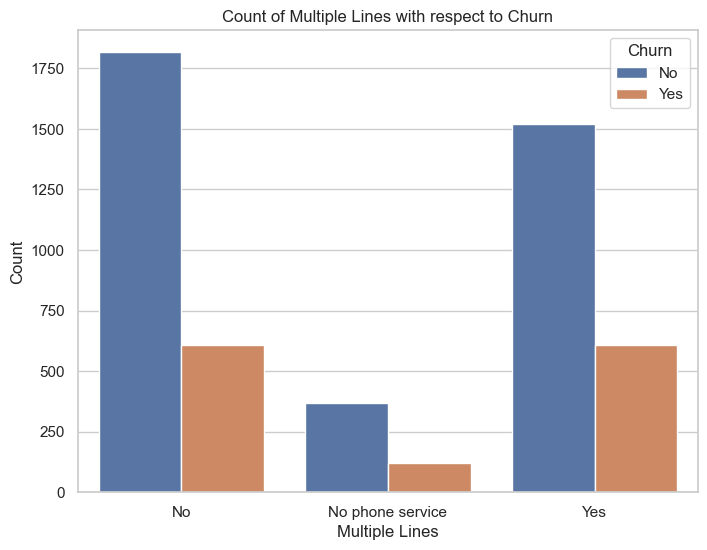

In [865]:
# Create a DataFrame for the count of "MultipleLines" against "Churn"
count_df = Telco_churn.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="MultipleLines", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.title("Count of Multiple Lines with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* For multiple lines the customers that churned had and did not have phone service are almost the same

## Device Protection Against Churn


In [866]:
# Create a DataFrame for the count of "DeviceProtection" against "Churn"
count_df = Telco_churn.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="DeviceProtection", y="Count", color="Churn",
             title="Count of Device Protection with respect to Churn",
             labels={"DeviceProtection": "Device Protection", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


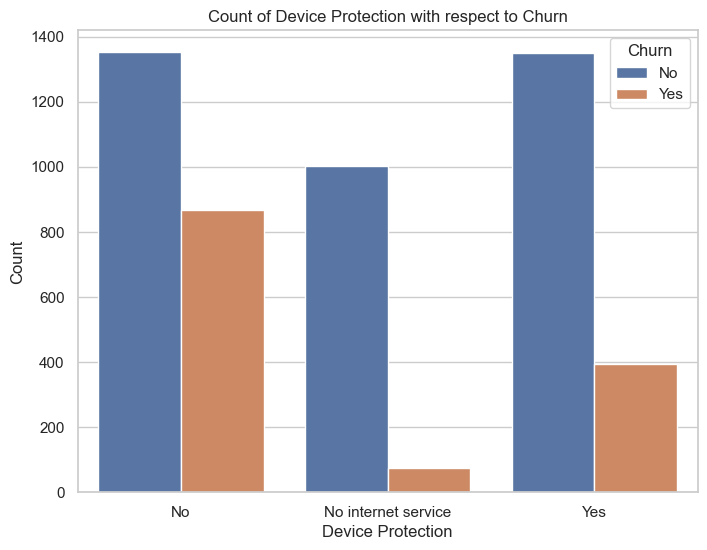

In [867]:
# Create a DataFrame for the count of "DeviceProtection" against "Churn"
count_df = Telco_churn.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="DeviceProtection", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.title("Count of Device Protection with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customers with no device protection and device protection are the most loyal
* Customers with no device protection churned the most

## Tech Support Against Churn

In [868]:
# Create a DataFrame for the count of "TechSupport" against "Churn"
count_df = Telco_churn.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="TechSupport", y="Count", color="Churn",
             title="Count of Tech Support with respect to Churn",
             labels={"TechSupport": "Tech Support", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


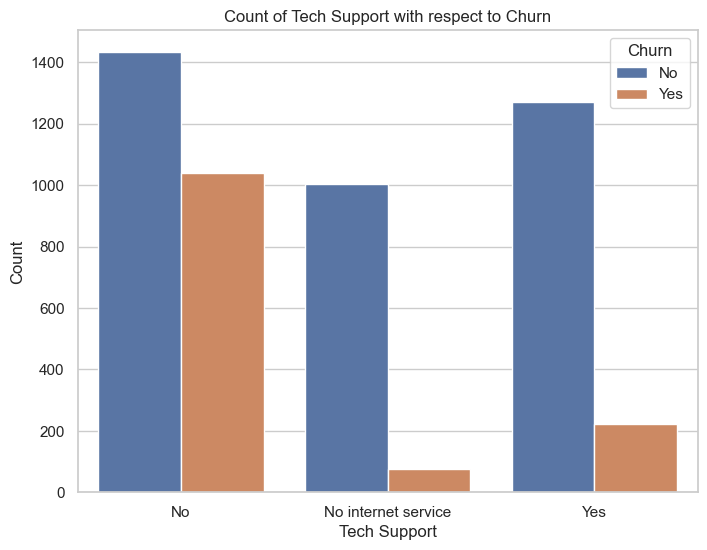

In [869]:
# Create a DataFrame for the count of "TechSupport" against "Churn"
count_df = Telco_churn.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="TechSupport", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.title("Count of Tech Support with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Most churn came from customers with no tech support

## StreamingTv Against Churn

In [870]:
# Create a DataFrame for the count of "StreamingTV" against "Churn"
count_df = Telco_churn.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="StreamingTV", y="Count", color="Churn",
             title="Count of Streaming Tv with respect to Churn",
             labels={"StreamingTV": "Streaming Tv", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


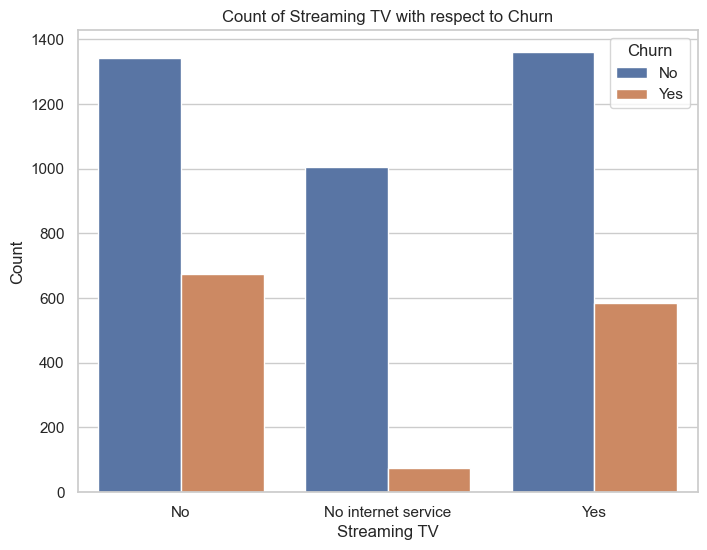

In [871]:
# Create a DataFrame for the count of "StreamingTV" against "Churn"
count_df = Telco_churn.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="StreamingTV", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.title("Count of Streaming TV with respect to Churn")


# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* The most loyal customers had streaming tv 
* Customers churned with no streaming tv

## Streaming Movies Against Churn

In [872]:
# Create a DataFrame for the count of "StreamingMovies" against "Churn"
count_df = Telco_churn.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="StreamingMovies", y="Count", color="Churn",
             title="Count of Streaming Movies with respect to Churn",
             labels={"StreamingMovies": "Streaming Movies", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


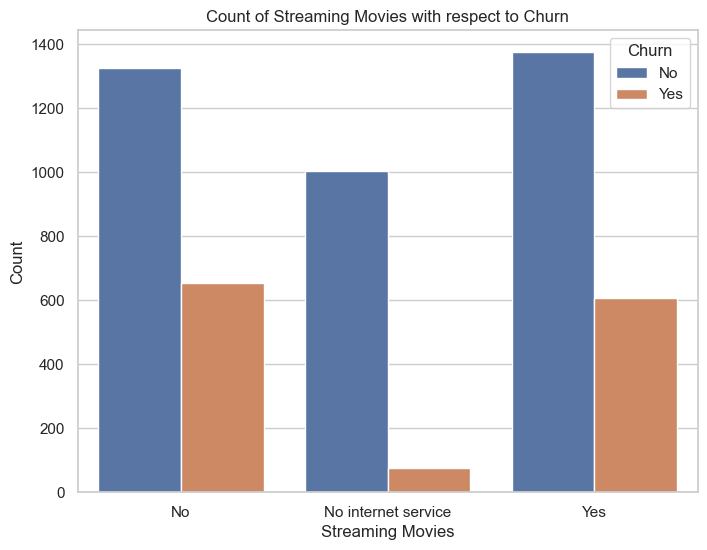

In [873]:
# Create a DataFrame for the count of "StreamingMovies" against "Churn"
count_df = Telco_churn.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="StreamingMovies", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.title("Count of Streaming Movies with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customer with no access to stream movies churned the most


# Bivariate Analysis

### Relationship between total charges and monthly charges with respect to churn

In [874]:
#We will like to see if total charges increase with Monthlycharges
fig=px.scatter(Telco_churn,x="MonthlyCharges",y="TotalCharges",color="Churn",title="Relationship Between MonthlyCharges and Total Charges With Respect to Churn")

fig.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

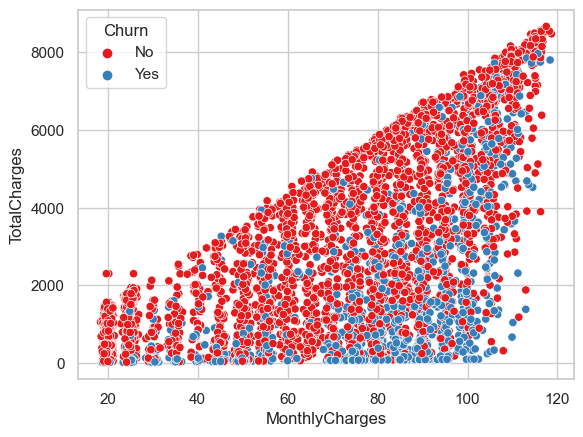

In [875]:
sns.scatterplot(data=Telco_churn,x="MonthlyCharges",hue="Churn",y="TotalCharges",palette="Set1")

## Notes
* There is a positive correlation between monthly charges and total charges
* The more monthly charges a customer has the more total charges they pay.
* A monthly charge increases churn increases and when monthly charge reduces churn reduces


## Relationship Between Total Charges and Tenure With Respect to churn

In [876]:
fig=px.scatter(Telco_churn,x="tenure",y="TotalCharges",color="Churn",title="Relationship Between Total Charges and Tenure With Respect to Churn")

fig.show()

<Axes: xlabel='tenure', ylabel='TotalCharges'>

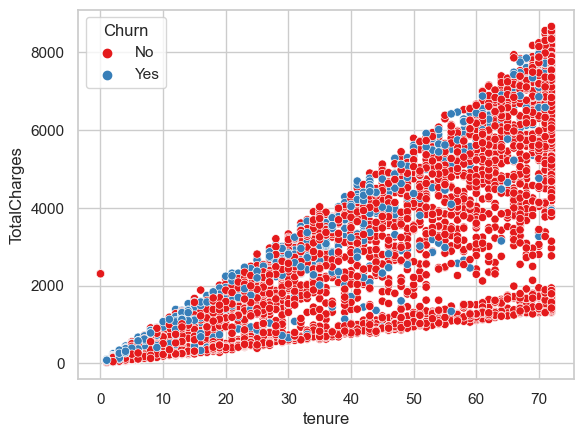

In [877]:
sns.scatterplot(data=Telco_churn,x="tenure",hue="Churn",y="TotalCharges",palette="Set1")

## Notes
* Total charges and tenure are positively correlated
* As the time the customer spends at the company increases total charges increases
* As tenure increases churn decreases


## Relationship between Monthly Charges and Tenure With Respect to Churn

In [878]:
fig=px.scatter(Telco_churn,x="tenure",y="MonthlyCharges",color="Churn",title="Relationship Between Monthly Charges and Tenure With Respect to Churn")

fig.show()

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

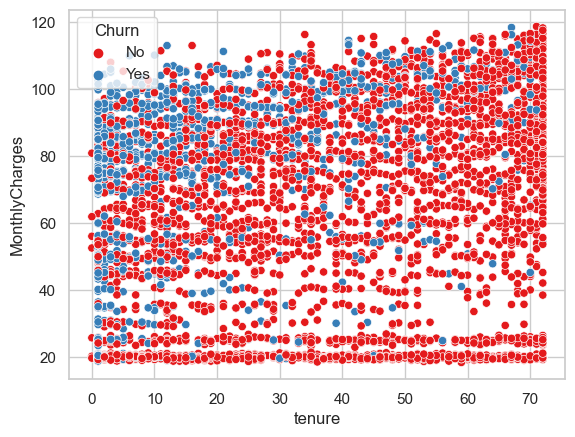

In [879]:
sns.scatterplot(data=Telco_churn,x="tenure",hue="Churn",y="MonthlyCharges",palette="Set1")

## Notes
* There is no correlation

## Relationship Between Churn and TotalCharges with Respect to Contract

In [880]:
px.box(data_frame= Telco_churn, x="Churn", y= "TotalCharges", color="Contract", title= "Relationship Between Churn and TotalCharges with Respect to Contract")

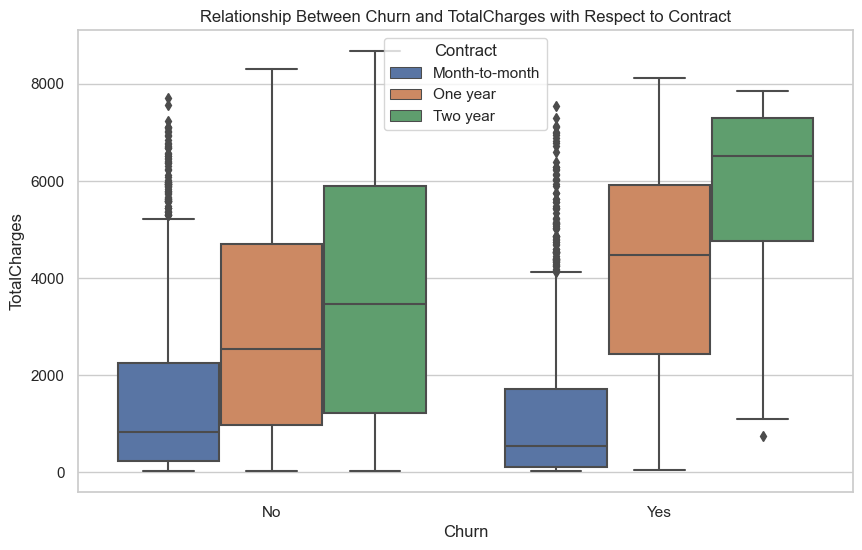

In [881]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="TotalCharges", hue="Contract")
plt.title("Relationship Between Churn and TotalCharges with Respect to Contract")
plt.show()

## Notes
* Churners pay more than non-churners

#### For No Churn:

- month-to-month customers who didn't churn are spending between 234 and 2,242. 

- Customers who are on a one-year plan and haven't churned spend  between 961 and 4692

- Customers who are on a two-year plan spend between 1218 and 5897. 


#### For Yes Churn:

-  customers who were on a month to month plan and churned spent between 98 and 1711. 

- customers who were on a one-year plan and churned spent between 2405 and 5918. 

-  customers who were on a two-year plan and churned spent spent between 4759 and 7856. 
. 


#### For Outliers:


- For the No churn,a lot of customers who are on a month-to-month plan spent more than 5222, which is far more than what the average customer from that sample is paying. 

- Similarly, a lot of churners on a month-to-month plan were spending more than 4113, which is far more than what the average customer from that sample is paying. 

- Only one customer Spent less than 740 on a 2 year plan


## Relationship Between Churn and Tenure with Respect to Contract

In [882]:
px.box(data_frame= Telco_churn, x="Churn", y= "tenure", color="Contract", title= "Relationship Between Churn and tenure with Respect to Contract")

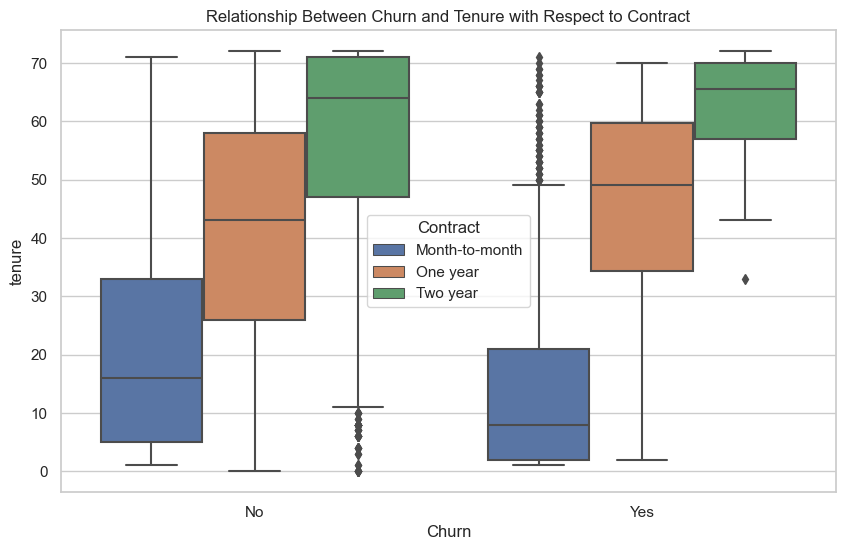

In [883]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="tenure", hue="Contract")
plt.title("Relationship Between Churn and Tenure with Respect to Contract")
plt.show()

## Notes

#### For No Churn:

- Month-to-Month customers who didn't churn currently have a tenure between 5  and 33 months with the median tenure being 16 months.

- Customers who are on a one-year plan are on their 26th to 58th month. This shows most of them have renewed their service with the company

- customers who are on a two-year plan are on thier 47th to 72th month. 


#### For Yes Churn:

- customers who were on a month to month plan and churned spent only 2 to 21 months with the company. 

- customers who were on a one-year plan and churned spent only 34 to 70 months with the company. 

- customers who were on a two-year plan and churned spent only 57 to 72 months with the company. 


#### For Outliers:


- For No Churn, quite a number of customers who were on a two year plan-- as displayed by the dots below the lower whishker-- only had a tenure between 0 and 10 months. This could mean they churned within the timeframe, but the company failed to label them as Churners or it could also mean that they have newly subscribed to the two-year plan; hence, their low tenure.

- It can also be seen that some churners who were on a month-to-month contract plans spent more than 50 months with the company before churning. 

- Only one customers considered as a churner on a two-year contract spent less than 33 months with the company. 


## Relationship Between Churn and Monthly Charges with Respect to Contract

In [884]:
px.box(data_frame= Telco_churn, x="Churn", y= "MonthlyCharges", color="Contract", title= "Relationship Between Churn and Monthly Charges with Respect to Contract")

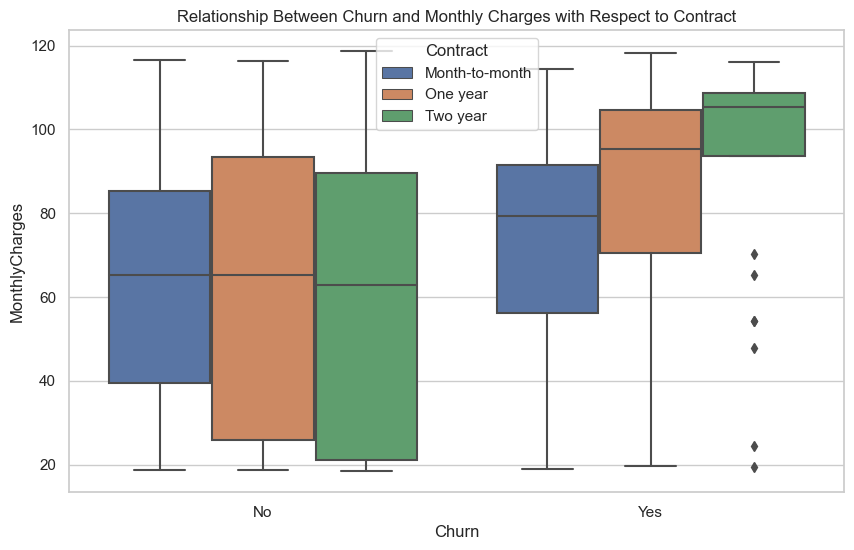

In [885]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="MonthlyCharges", hue="Contract")
plt.title("Relationship Between Churn and Monthly Charges with Respect to Contract")
plt.show()

## Notes
* Churners pay more monthly charges than non-churners

#### For No Churn:

- month-to-month customers who didn't churn are paying a monthly charge between 39.3 and 85.3

- Customers who are on a one-year plan and haven't churned pay a monthly charge between 26 and 93

- Customers who are on a two-year plan pay a monthly between 21 and 90 showing that the more you stay with comapny you pay less monthly charges



#### For Yes Churn:

-  customers who were on a month to month plan and churned payed a monthly charge between 56 and 92. 

- customers who were on a one-year plan and churned payed a monthly charge between 70 and 118. 

-  customers who were on a two-year plan and churned payed a monthly charge between 93 and 116. 
. 


#### For Outliers:


- Only six customer payed a monthly charge less than 93 on a 2 year plan


## Multivariate Analysis

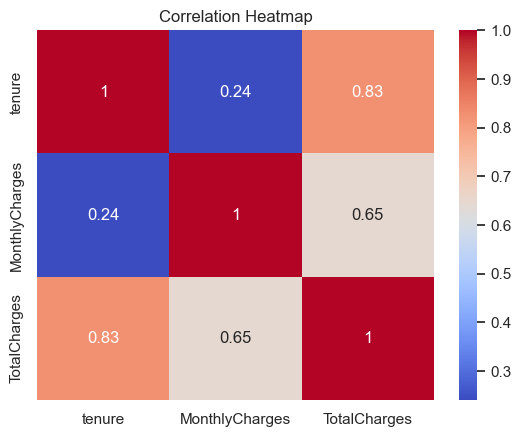

In [886]:
# Select numeric columns only
numeric_columns = Telco_churn.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Notes
* There is a high correlation between tenure and total charges and also between Monthly charges and total charges
* There is a low correlation between tenure and monthly charges

## DATA ANALYSIS

**Hypotheis Testing**

**Null Hypothesis (H0):** The Monthly Charges, Total charges and tenure do not have significant impact on the Churn rate.
 
**Alternative Hypothesis (H1):** The Monthly Charges, Total charges and tenure significantly impact the Churn rate. 


**Multiple Regression (Logistic Regression)**

**logistic regression** is a type of multiple regression used for predicting binary outcomes, and it is a suitable approach for analyzing the impact of multiple predictor variables (independent variables) on a binary categorical target variable (dependent variable).

In [887]:
# Create a copy of the data
Telco_churn_copy = Telco_churn.copy()

In [888]:
Telco_churn_copy.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check       29.850000     29.850000   
1               No               Mailed check       56.950001   1889.500000   
2              Yes               Mailed check       53.849998    108.150002   
3               No  Bank transfer (automatic)       42.299999   1840.750000   
4              Yes           Electronic check       70.699997    151.649994   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [889]:
X = Telco_churn_copy[['MonthlyCharges', 'TotalCharges', 'tenure']]
y = Telco_churn_copy['Churn']

# Convert the 'churn' variable to binary numeric values (0 and 1)
y = pd.get_dummies(y, drop_first=True)['Yes']

# Add an intercept
X = sm.add_constant(X)

# Fit the logistic regression model

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.452138
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    Yes   No. Observations:                 5043
Model:                          Logit   Df Residuals:                     5039
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Aug 2023   Pseudo R-squ.:                  0.2179
Time:                        08:07:12   Log-Likelihood:                -2280.1
converged:                       True   LL-Null:                       -2915.6
Covariance Type:            nonrobust   LLR p-value:                3.069e-275
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7064      0.139    -12.281      0.000      -1.979      -1.434
MonthlyCharges   

The **Pseudo R-squared** value indicates the proportion of variance explained by the model. A higher value indicates a better fit.
The Pseudo R-squared is 0.2179 which is approximately 21.79% of the variation in the probability of churn based on the predictor variables included in the model.

**Coefficients:** The sign of the coefficient indicates the direction of the relationship between the predictor variable and the probability of churn. A positive coefficient suggests that an increase in the predictor variable is associated with a higher likelihood of churn, while a negative coefficient suggests the opposite.

The coefficient for 'MonthlyCharges' is 0.0314 which means that as the monthly charges increase, the likelihood of churn also increases.

The coefficient for 'TotalCharges' is 0.0001 which suggests that as the total charges increase, the likelihood of churn also increases.

The coefficient for 'tenure' is -0.0640 which indicates that as the tenure (the length of time the customer has been with the company) increases, the likelihood of churn decreases.

**P-values of Predictors**

**MonthlyCharges:** The p-value is 0.000, which is less than the significance level (0.05) which implies that Monthly Charges has a statistically significant impact on the probability (likelihood) of churn.

**TotalCharges:** The p-value is 0.097, which is greater than the significance level (0.05) which implies that Total Charges has no statistically significant impact on the probability (likelihood) of churn.

**Tenure:** The p-value is 0.000, which is less than the significance level (0.05) which means that Tenure has a statistically significant impact on the probability (likelihood) of churn.


**likelihood ratio test (LLR) p-value**

**likelihood ratio test (LLR) p-value** tests the joint significance of all the predictor variables in the model.

The LLR p-value is 3.069e-275, which is extremely lower than the sig. value (0.05). This indicates strong evidence against the null hypothesis, suggesting that the joint effect of the predictor variables on churn is statistically significant.

### A graph to visualize the joint impact of the significant predictor variables (MonthlyCharges and tenure) on the probability of churn. 

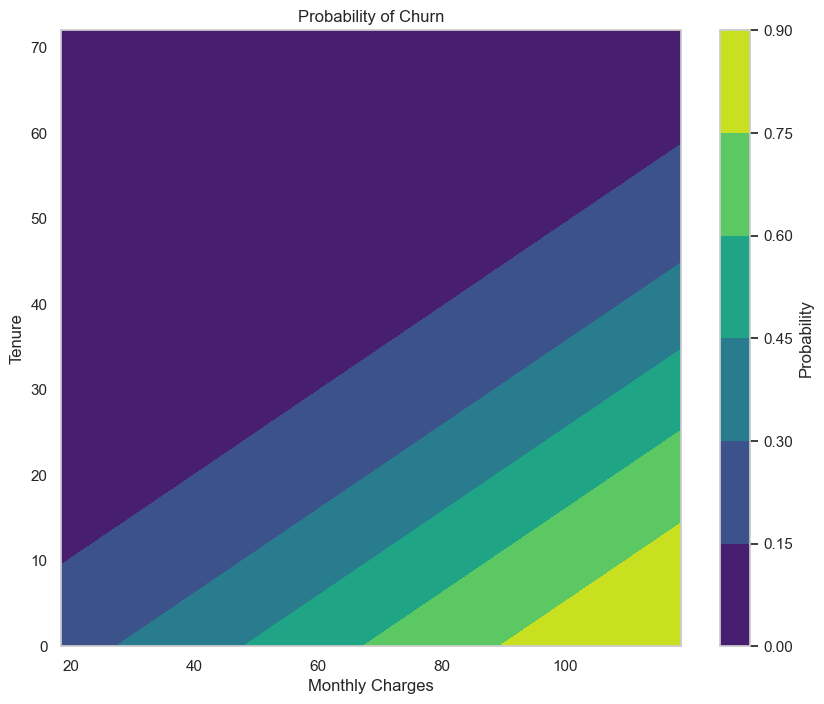

In [890]:
# Define the range of values for MonthlyCharges and tenure
monthly_charges_range = np.linspace(data['MonthlyCharges'].min(), data['MonthlyCharges'].max(), 100)
tenure_range = np.linspace(data['tenure'].min(), data['tenure'].max(), 100)

# Create a meshgrid of MonthlyCharges and tenure values
MonthlyCharges, tenure = np.meshgrid(monthly_charges_range, tenure_range)

# Calculate the predicted probabilities of churn for each combination of MonthlyCharges and tenure
log_odds = -1.7064 + 0.0314 * MonthlyCharges - 0.0640 * tenure
prob_churn = 1 / (1 + np.exp(-log_odds))

# Create a 2D contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(MonthlyCharges, tenure, prob_churn, cmap='viridis')

# Set axis labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Probability of Churn')

# Add a color bar for the probability scale
cbar = plt.colorbar(contour)
cbar.set_label('Probability')

# Show the plot
plt.show()


We observed the joint impact of these two variables on the likelihood of churn. The higher the tenure the lower the probability to churn. The higher the monthly charges the higher the probability to churn.

**Question 1:** Which gender exhibited the highest churn?

In [891]:
# Create a copy of the data
Telco_churn_copy2 = Telco_churn.copy()

In [892]:
Telco_churn_copy2.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check       29.850000     29.850000   
1               No               Mailed check       56.950001   1889.500000   
2              Yes               Mailed check       53.849998    108.150002   
3               No  Bank transfer (automatic)       42.299999   1840.750000   
4              Yes           Electronic check       70.699997    151.649994   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

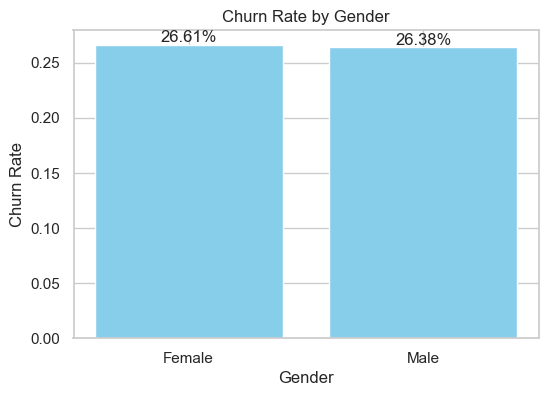

In [893]:
# Convert 'Yes' and 'No' to numeric values (1 and 0, respectively) in the 'Churn' column
Telco_churn_copy2['Churn'] = Telco_churn_copy2['Churn'].map({'Yes': 1, 'No': 0})

# Group the data by 'gender' and calculate the churn rate for each gender
gender_churn_rate = Telco_churn_copy2.groupby('gender')['Churn'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(gender_churn_rate.index, gender_churn_rate.values, color='skyblue')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')

# Add percentage labels on top of each bar
for index, value in enumerate(gender_churn_rate.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

The churn rate for females is approximately 26.61%, while the churn rate for males is approximately 26.38%. The churn rates for both genders are relatively close, with a slightly higher churn rate for females. 

**Question 2:** Is the a significant association between gender and churn?

The **Chi-Square test** can assess whether there is a significant association between the two categorical variables.

Chi-Square Statistic: 0.024146708104267937
P-value: 0.8765
Degrees of Freedom: 1
Expected Frequencies Table:
           Churn=No   Churn=Yes
Female  1825.934563  658.065437
Male    1881.065437  677.934563


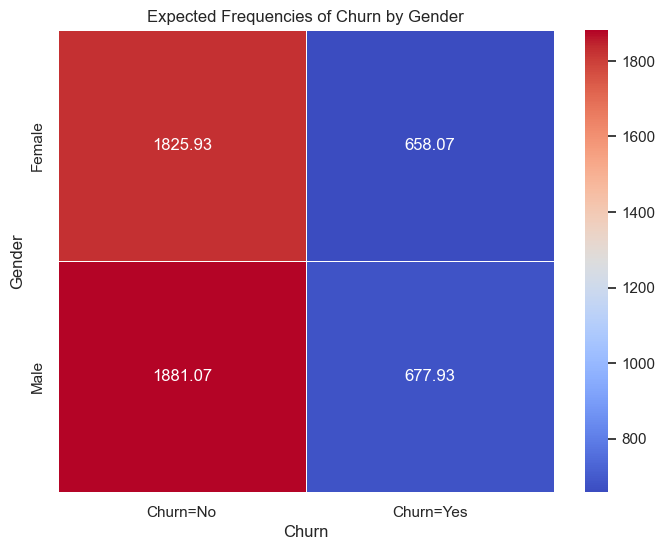

In [894]:
# Create a contingency table of 'gender' and 'Churn'
contingency_table = pd.crosstab(Telco_churn_copy2['gender'], Telco_churn_copy2['Churn'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Create a DataFrame for the expected frequencies table
expected_df = pd.DataFrame(expected, index=['Female', 'Male'], columns=['Churn=No', 'Churn=Yes'])


# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", '{:.4f}'.format(p_value))
print("Degrees of Freedom:", dof)

# Print the expected frequencies table
print("Expected Frequencies Table:")
print(expected_df)

# Create a heatmap to visualize the expected counts
plt.figure(figsize=(8, 6))
sns.heatmap(expected_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Churn')
plt.ylabel('Gender')
plt.title('Expected Frequencies of Churn by Gender')
plt.show()

**Question 3:** Does the presence of dependents affect customer churn? 

Chi-Square Statistic: 147.65303980235052
P-value: 0.0000
Degrees of Freedom: 1

Expected Frequencies Table:
                   Churn=No   Churn=Yes
Dependents=Yes  2559.542733  922.457267
Dependents=No   1147.457267  413.542733


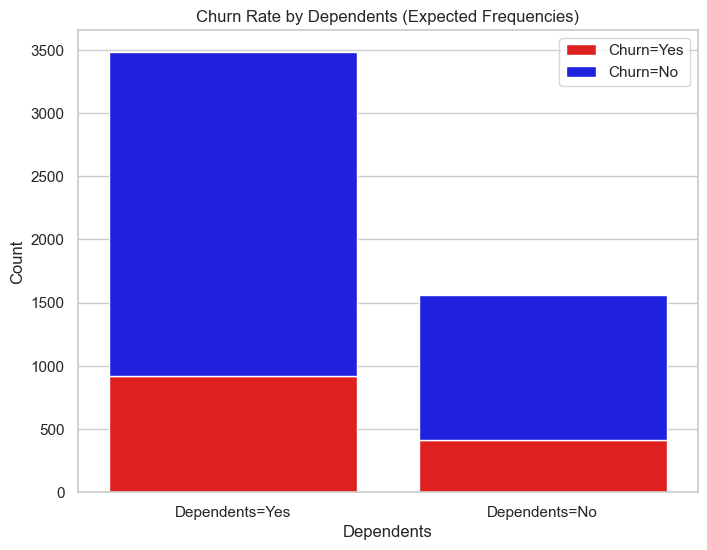

In [895]:

# Create a contingency table of 'Dependents' and 'Churn'
contingency_table_dependents = pd.crosstab(Telco_churn_copy2['Dependents'], Telco_churn_copy2['Churn'])

# Perform the Chi-Square test to get the expected frequencies and other statistics
chi2_dependents, p_value_dependents, dof_dependents, expected_dependents = chi2_contingency(contingency_table_dependents)

# Convert the p-value to normal decimal form and round it to 4 decimal places
p_value_dependents = "{:.4f}".format(p_value_dependents)


# Create a DataFrame for the expected frequencies table
expected_df = pd.DataFrame(expected_dependents, index=['Dependents=Yes', 'Dependents=No'], columns=['Churn=No', 'Churn=Yes'])

# Print the Chi-Square test results and expected frequencies table
print("Chi-Square Statistic:", chi2_dependents)
print("P-value:", p_value_dependents)
print("Degrees of Freedom:", dof_dependents)
print("\nExpected Frequencies Table:")
print(expected_df)

# Create a stacked bar plot to visualize the expected frequencies
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=expected_df.index, y=expected_df['Churn=Yes'], color='red', label='Churn=Yes')
sns.barplot(x=expected_df.index, y=expected_df['Churn=No'], color='blue', bottom=expected_df['Churn=Yes'], label='Churn=No')

# Add labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Churn Rate by Dependents (Expected Frequencies)')
plt.legend()

# Show the plot
plt.show()


The Chi-Square statistic is 147.65, indicating that there is a significant discrepancy between the observed and expected frequencies of the 'Dependents' and 'Churn' variables.  The P-value is 0.000, which is significantly smaller than the significance level of 0.05. This suggests a significant relationship between the presence or absence of dependents and customer churn. In other words, the presence of dependents does have a significant impact on customer churn in the telecommunications company.

For customers with Dependents, the expected count of churn customers is approximately 922.46, and the expected count of non-churn customers is approximately 2559.54.
For customers with no Dependents, the expected count of churn customers is approximately 413.54, and the expected count of non-churn customers is approximately 1147.46.

Customers with dependents tend to exhibit different churn behavior compared to those without dependents Therefore, understanding how customer churn behavior varies for customers with and without dependents can help in designing targeted retention strategies for each segment.

**Question 4:** Which gender pays more monthly charges? 

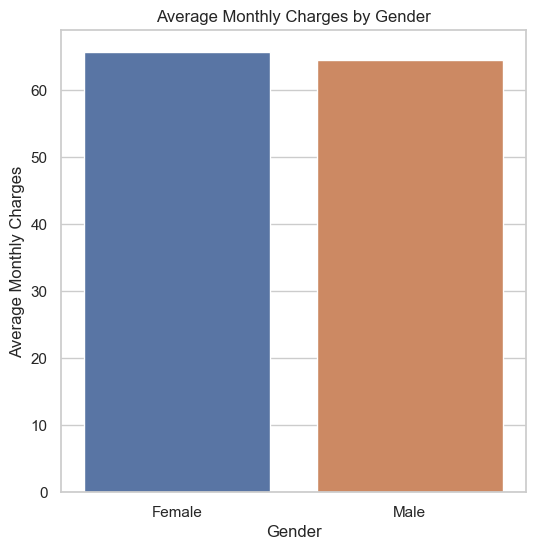

In [896]:
# Create a bar plot to compare average monthly charges for each gender
plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='MonthlyCharges', data=Telco_churn_copy2, ci=None)
plt.xlabel('Gender')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Gender')
plt.show()


Averagely, female customers tend to have a slightly higher monthly charges compared to male customers. This could be a valuable insight for the telecommunication company in understanding the spending behavior of its customer base and potentially tailoring marketing strategies or offers based on gender-specific preferences and needs. 

**Question 5:** Does the presence of dependents affect monthly charges?

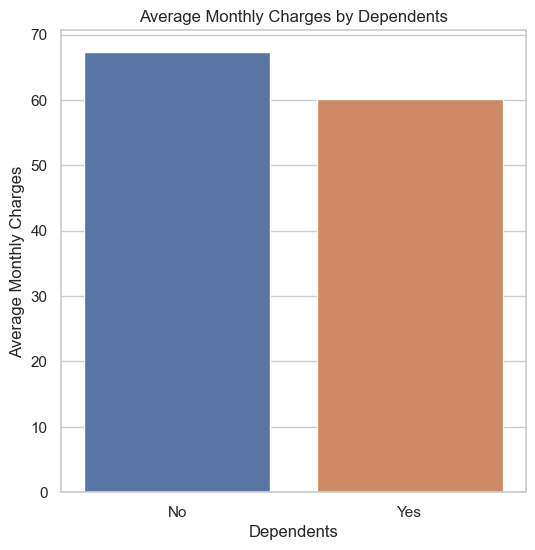

In [897]:
# Create a grouped bar plot to compare average monthly charges for customers with and without dependents
plt.figure(figsize=(6, 6))
sns.barplot(x='Dependents', y='MonthlyCharges', data=Telco_churn_copy2, ci=None)
plt.xlabel('Dependents')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Dependents')
plt.show()



On the average, customers without dependents have higher monthly charges compared to customers with dependents. This insight can be valuable for the telecommunication companies in understanding the spending behavior of different customer segments. It may help them tailor their marketing strategies or offers based on customers' family status and financial preferences.

**Question 6:** Do paperless billing and payment methods influence churn?  

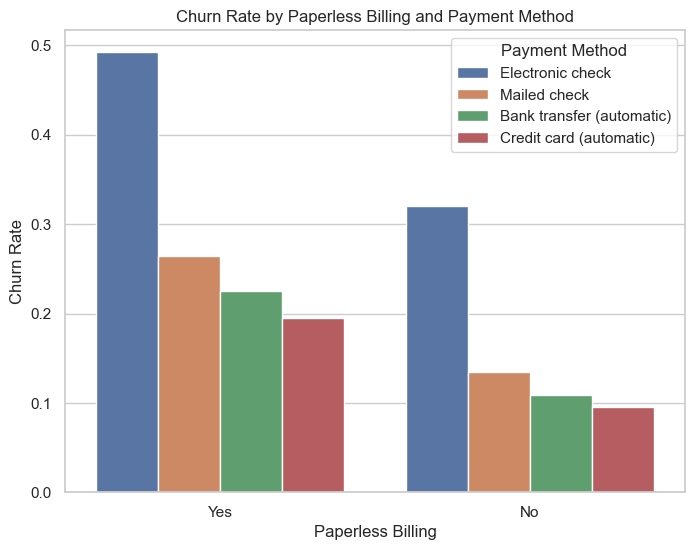

In [898]:
# Create a grouped bar plot to compare churn rate for different paperless billing and payment methods
plt.figure(figsize=(8, 6))
sns.barplot(x='PaperlessBilling', y='Churn', hue='PaymentMethod', data=Telco_churn_copy2, ci=None)
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Paperless Billing and Payment Method')
plt.legend(title='Payment Method', loc='upper right')
plt.show()


Based on the graph, it is evident that customers who opt for paperless billings and pay through electronic checks experience a higher churn rate compared to those using credit cards, which have the lowest churn rate. Similarly, customers who don't use paperless billings and pay via electronic checks also exhibit a higher churn rate than those using credit cards. Moreover, among customers using electronic checks, those who prefer paperless billings churn more frequently than those who don't opt for paperless billing. 

In conclusion, the telecommunication company should focus on promoting paperless billing with credit cards and enhancing the electronic check experience as key measures to mitigate the issue of high churn rate.

**Question 7:** Is there a correlation between senior citizens and churn?

Chi-Square Statistic: 112.38513864964213
P-value: 0.0000
Degrees of Freedom: 1

Expected Frequencies Table:
                       Churn=No    Churn=Yes
Not Senior Citizen  3104.970851  1119.029149
Senior Citizen       602.029149   216.970851


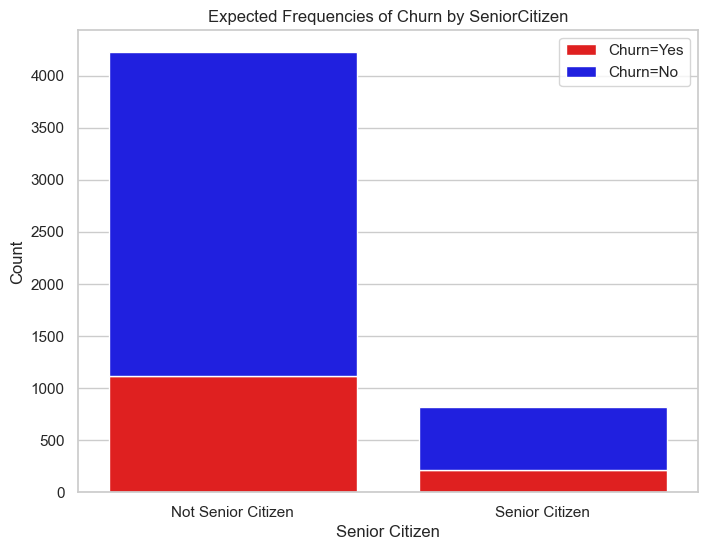

In [899]:
# Create a contingency table of 'SeniorCitizen' and 'Churn'
contingency_table_senior = pd.crosstab(Telco_churn_copy2['SeniorCitizen'], Telco_churn_copy2['Churn'])

# Perform the Chi-Square test
chi2_senior, p_value_senior, dof_senior, expected_senior = chi2_contingency(contingency_table_senior)

# Create a DataFrame for the expected frequencies table
expected_df_senior = pd.DataFrame(expected_senior, index=['Not Senior Citizen', 'Senior Citizen'], columns=['Churn=No', 'Churn=Yes'])

# Convert the p-value from scientific notation to normal form and round to 4 decimal places
p_value_senior = "{:.4f}".format(p_value_senior)

# Print the results
print("Chi-Square Statistic:", chi2_senior)
print("P-value:", p_value_senior)
print("Degrees of Freedom:", dof_senior)

# Print the expected frequencies table
print("\nExpected Frequencies Table:")
print(expected_df_senior)

# Visualize the expected frequencies table
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=expected_df_senior.index, y=expected_df_senior['Churn=Yes'], color='red', label='Churn=Yes')
sns.barplot(x=expected_df_senior.index, y=expected_df_senior['Churn=No'], color='blue', bottom=expected_df_senior['Churn=Yes'], label='Churn=No')

# Add labels and title
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Expected Frequencies of Churn by SeniorCitizen')
plt.legend()

# Show the plot
plt.show()


There is a significant relationship between being a Senior Citizen and Churn. The p-value of 0.000 is less than the significance value, indicating that the association is not likely due to chance. Therefore, being a Senior Citizen has a significant impact on customer churn.

For the "Not Senior Citizen" group the expected count for no Churn is approximately 3105 and Churn is approximately 1119. For the "Senior Citizen" group the expected count for no Churn is approximately 602 and Churn is approximately 217. The expected freqencies between senior citizens and non senior citizen with respect to churn are not equal which indicates that being a Senior Citizen has a significant impact on churn.